In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Problem : Logistic Regression and Linear Discriminant Analysis

You are hired by the Government to do an analysis of car crashes. You are provided details of car crashes, among which some people survived and some didn't. You have to help the government in predicting whether a person will survive or not on the basis of the information given in the data set .

# 2.1) Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis. 

In [2]:
#Reading the data
df= pd.read_csv("car_crash.csv")
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
df.dtypes

dvcat           object
weight         float64
Survived        object
airbag          object
seatbelt        object
frontal          int64
sex             object
ageOFocc         int64
yearacc          int64
yearVeh        float64
abcat           object
occRole         object
deploy           int64
injSeverity    float64
caseid          object
dtype: object

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
weight,11217.0,431.405309,1406.202941,0.0,28.292,82.195,324.056,31694.04
frontal,11217.0,0.644022,0.478830,0.0,0.000,1.000,1.000,1.00
ageOFocc,11217.0,37.427654,18.192429,16.0,22.000,33.000,48.000,97.00
yearacc,11217.0,2001.103236,1.056805,1997.0,2001.000,2001.000,2002.000,2002.00
yearVeh,11217.0,1994.177944,5.658704,1953.0,1991.000,1995.000,1999.000,2003.00
deploy,11217.0,0.389141,0.487577,0.0,0.000,0.000,1.000,1.00
injSeverity,11140.0,1.825583,1.378535,0.0,1.000,2.000,3.000,5.00


In [6]:
df.shape

(11217, 15)

In [7]:
df.isnull().sum()

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

In [8]:
#As we can see that there are 77 values are missing in "injsecurity".

In [9]:
df.columns

Index(['dvcat', 'weight', 'Survived', 'airbag', 'seatbelt', 'frontal', 'sex',
       'ageOFocc', 'yearacc', 'yearVeh', 'abcat', 'occRole', 'deploy',
       'injSeverity', 'caseid'],
      dtype='object')

In [10]:
for i in df.columns:
    print(df[i].value_counts(ascending=True))
      

1-9km/h     282
55+         809
40-54      1344
25-39      3368
10-24      5414
Name: dvcat, dtype: int64
5.924       1
46.582      1
25.709      1
75.795      1
255.407     1
           ..
10.761     51
54.303     52
38.994     53
72.176     57
1.000      65
Name: weight, Length: 4551, dtype: int64
Not_Survived     1180
survived        10037
Name: Survived, dtype: int64
none      4153
airbag    7064
Name: airbag, dtype: int64
none      3368
belted    7849
Name: seatbelt, dtype: int64
0    3993
1    7224
Name: frontal, dtype: int64
f    5169
m    6048
Name: sex, dtype: int64
95      1
93      5
97      5
92      6
91      7
     ... 
20    410
21    428
17    445
18    461
19    484
Name: ageOFocc, Length: 80, dtype: int64
1998     198
1999     200
1997     224
2000    1716
2001    4115
2002    4764
Name: yearacc, dtype: int64
1953.0       1
1967.0       1
1961.0       1
1963.0       2
1956.0       2
1965.0       3
1968.0       4
1972.0       5
1966.0       5
1973.0       5
1970.0     

# EDA

In [11]:
df.columns

Index(['dvcat', 'weight', 'Survived', 'airbag', 'seatbelt', 'frontal', 'sex',
       'ageOFocc', 'yearacc', 'yearVeh', 'abcat', 'occRole', 'deploy',
       'injSeverity', 'caseid'],
      dtype='object')

In [12]:
df_countplot=['dvcat', 'airbag', 'seatbelt', 'frontal','abcat','deploy','injSeverity']

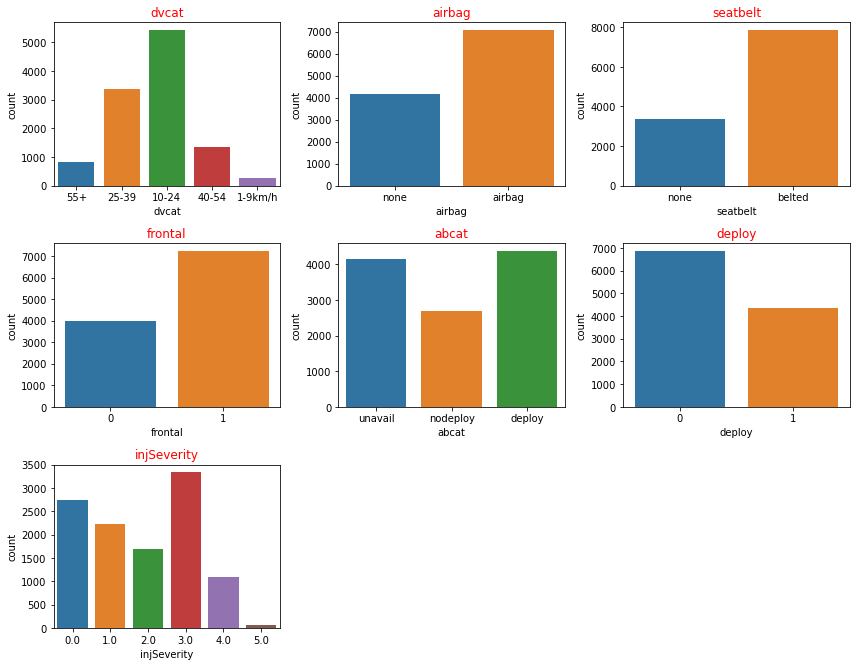

In [13]:
fig=plt.figure(figsize=(12,12))
for i in range(0,len(df_countplot)):
   ax=fig.add_subplot(4,3,i+1)
   sns.countplot(df[df_countplot[i]])
   ax.set_title(df_countplot[i],color='Red')
plt.tight_layout()

In [14]:
df_countplot=['dvcat', 'airbag', 'seatbelt', 'frontal','abcat','injSeverity']

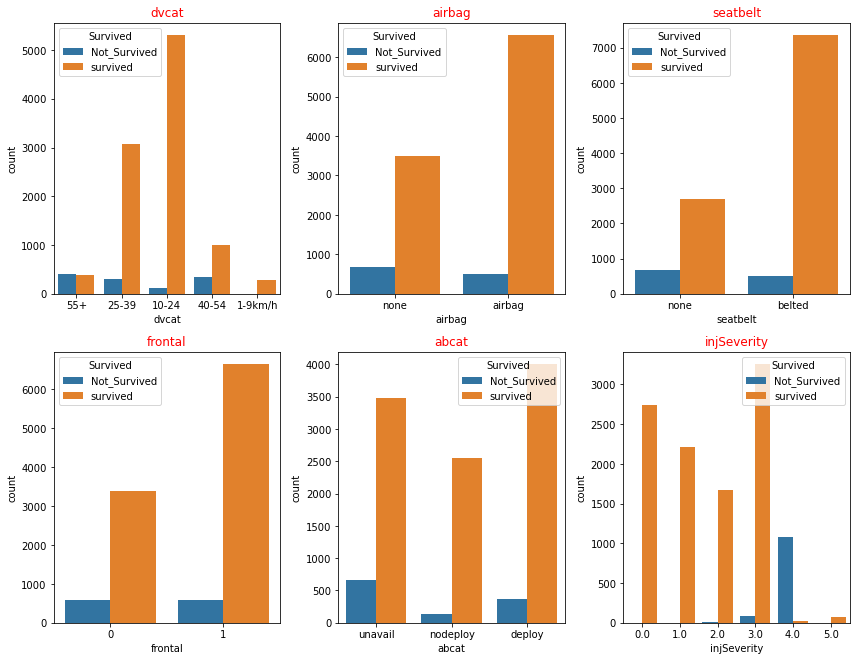

In [15]:
fig=plt.figure(figsize=(12,18))
for i in range(0,len(df_countplot)):
   ax=fig.add_subplot(4,3,i+1)
   sns.countplot(df[df_countplot[i]],hue=df["Survived"])
   ax.set_title(df_countplot[i],color='Red')
plt.tight_layout()

# Data cleaning

In [16]:
df.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1


In [17]:
df["Survived"].value_counts()

survived        10037
Not_Survived     1180
Name: Survived, dtype: int64

In [18]:
df["Survived"]=np.where(df["Survived"]=="survived",1,0)

In [19]:
df["Survived"].value_counts()

1    10037
0     1180
Name: Survived, dtype: int64

In [20]:
df["airbag"].value_counts()

airbag    7064
none      4153
Name: airbag, dtype: int64

In [21]:
df["airbag"]=np.where(df["airbag"]=="airbag",1,0)

In [22]:
df["airbag"].value_counts()

1    7064
0    4153
Name: airbag, dtype: int64

In [23]:
df["seatbelt"].value_counts()

belted    7849
none      3368
Name: seatbelt, dtype: int64

In [24]:
df["seatbelt"]=np.where(df["seatbelt"]=="belted",1,0)

In [25]:
df["seatbelt"].value_counts()

1    7849
0    3368
Name: seatbelt, dtype: int64

In [26]:
df["sex"].value_counts()

m    6048
f    5169
Name: sex, dtype: int64

In [27]:
df["sex"]=np.where(df["sex"]=="m",1,0)

In [28]:
df["sex"].value_counts()

1    6048
0    5169
Name: sex, dtype: int64

In [29]:
df["occRole"].value_counts()

driver    8786
pass      2431
Name: occRole, dtype: int64

In [30]:
df["occRole"]=np.where(df["occRole"]=="driver",1,0)

In [31]:
df["occRole"].value_counts()

1    8786
0    2431
Name: occRole, dtype: int64

In [32]:
df["abcat"].value_counts()

deploy      4365
unavail     4153
nodeploy    2699
Name: abcat, dtype: int64

In [33]:
df["abcat"]=df["abcat"].replace(["unavail"],"nodeploy")

In [34]:
df["abcat"].value_counts()

nodeploy    6852
deploy      4365
Name: abcat, dtype: int64

In [35]:
df["abcat"]=np.where(df["abcat"]=="nodeploy",0,1)

In [36]:
df["abcat"].value_counts()

0    6852
1    4365
Name: abcat, dtype: int64

In [37]:
df["deploy"].value_counts()

0    6852
1    4365
Name: deploy, dtype: int64

In [38]:
df["dvcat"].value_counts()

10-24      5414
25-39      3368
40-54      1344
55+         809
1-9km/h     282
Name: dvcat, dtype: int64

In [39]:
df.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,55+,27.078,0,0,0,1,1,32,1997,1987.0,0,1,0,4.0,2:13:2
1,25-39,89.627,0,1,1,0,0,54,1997,1994.0,0,1,0,4.0,2:17:1
2,55+,27.078,0,0,1,1,1,67,1997,1992.0,0,1,0,4.0,2:79:1
3,55+,27.078,0,0,1,1,0,64,1997,1992.0,0,0,0,4.0,2:79:1
4,55+,13.374,0,0,0,1,1,23,1997,1986.0,0,1,0,4.0,4:58:1


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  int32  
 3   airbag       11217 non-null  int32  
 4   seatbelt     11217 non-null  int32  
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  int32  
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  int32  
 11  occRole      11217 non-null  int32  
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(3), int32(6), int64(4), object(2)
memory usage: 1.0+ MB


In [41]:
df.dtypes

dvcat           object
weight         float64
Survived         int32
airbag           int32
seatbelt         int32
frontal          int64
sex              int32
ageOFocc         int64
yearacc          int64
yearVeh        float64
abcat            int32
occRole          int32
deploy           int64
injSeverity    float64
caseid          object
dtype: object

In [42]:
df.columns

Index(['dvcat', 'weight', 'Survived', 'airbag', 'seatbelt', 'frontal', 'sex',
       'ageOFocc', 'yearacc', 'yearVeh', 'abcat', 'occRole', 'deploy',
       'injSeverity', 'caseid'],
      dtype='object')

In [43]:
num_var=[ 'weight', 'Survived', 'airbag', 'seatbelt', 'frontal', 'sex',
       'ageOFocc', 'yearacc', 'yearVeh', 'abcat', 'occRole', 'deploy',
       'injSeverity']

<AxesSubplot:>

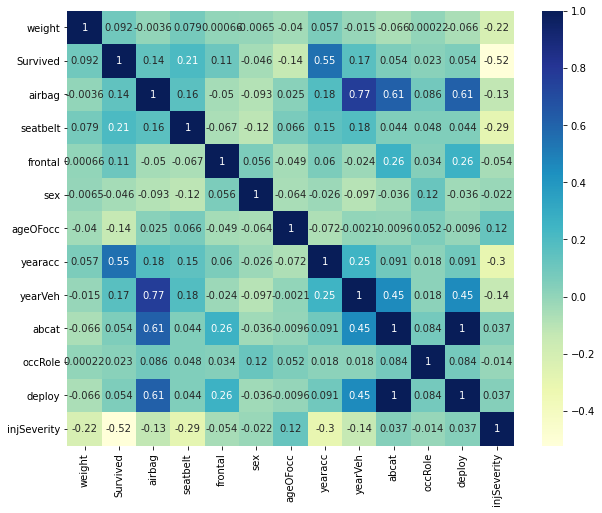

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_var].corr(),cmap="YlGnBu",annot=True)

In [45]:
#AS we can seee from the corr matrix "abcat" and "deploy" variables are 100% correlated to each other 
#we have remove either of them

In [46]:
df.drop("abcat",axis=1,inplace=True)

In [47]:
df.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity,caseid
0,55+,27.078,0,0,0,1,1,32,1997,1987.0,1,0,4.0,2:13:2
1,25-39,89.627,0,1,1,0,0,54,1997,1994.0,1,0,4.0,2:17:1
2,55+,27.078,0,0,1,1,1,67,1997,1992.0,1,0,4.0,2:79:1
3,55+,27.078,0,0,1,1,0,64,1997,1992.0,0,0,4.0,2:79:1
4,55+,13.374,0,0,0,1,1,23,1997,1986.0,1,0,4.0,4:58:1


In [48]:
df.tail()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity,caseid
11212,25-39,3179.688,1,0,1,1,1,17,2002,1985.0,1,0,0.0,82:107:1
11213,10-24,71.228,1,1,1,1,1,54,2002,2002.0,1,0,2.0,82:108:2
11214,10-24,10.474,1,1,1,1,0,27,2002,1990.0,1,1,3.0,82:110:1
11215,25-39,10.474,1,1,1,1,0,18,2002,1999.0,1,1,0.0,82:110:2
11216,25-39,10.474,1,1,1,1,1,17,2002,1999.0,0,1,0.0,82:110:2


In [49]:
df.shape

(11217, 14)

In [50]:
df['ageOfVeh']=df['yearacc']-df['yearVeh']

In [51]:
df.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,occRole,deploy,injSeverity,caseid,ageOfVeh
0,55+,27.078,0,0,0,1,1,32,1997,1987.0,1,0,4.0,2:13:2,10.0
1,25-39,89.627,0,1,1,0,0,54,1997,1994.0,1,0,4.0,2:17:1,3.0
2,55+,27.078,0,0,1,1,1,67,1997,1992.0,1,0,4.0,2:79:1,5.0
3,55+,27.078,0,0,1,1,0,64,1997,1992.0,0,0,4.0,2:79:1,5.0
4,55+,13.374,0,0,0,1,1,23,1997,1986.0,1,0,4.0,4:58:1,11.0


In [52]:
df.drop(["yearacc","yearVeh","caseid"],axis=1,inplace=True)

In [53]:
df.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,occRole,deploy,injSeverity,ageOfVeh
0,55+,27.078,0,0,0,1,1,32,1,0,4.0,10.0
1,25-39,89.627,0,1,1,0,0,54,1,0,4.0,3.0
2,55+,27.078,0,0,1,1,1,67,1,0,4.0,5.0
3,55+,27.078,0,0,1,1,0,64,0,0,4.0,5.0
4,55+,13.374,0,0,0,1,1,23,1,0,4.0,11.0


In [54]:
df1=df.dropna()

In [55]:
df1.isnull().values.any()

False

In [56]:
df1.shape

(11140, 12)

# 2.2) Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis). 

In [57]:
df2= pd.get_dummies(df1)

In [58]:
df2.head()

,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,occRole,deploy,injSeverity,ageOfVeh,dvcat_1-9km/h,dvcat_10-24,dvcat_25-39,dvcat_40-54,dvcat_55+
0,27.078,0,0,0,1,1,32,1,0,4.0,10.0,0,0,0,0,1
1,89.627,0,1,1,0,0,54,1,0,4.0,3.0,0,0,1,0,0
2,27.078,0,0,1,1,1,67,1,0,4.0,5.0,0,0,0,0,1
3,27.078,0,0,1,1,0,64,0,0,4.0,5.0,0,0,0,0,1
4,13.374,0,0,0,1,1,23,1,0,4.0,11.0,0,0,0,0,1


In [59]:
df2.shape

(11140, 16)

# Splitting the dataset

In [60]:
X= df2.drop("Survived",axis=1)
y= df2["Survived"]

# Train Test Split

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.30, random_state=16)

# Logistic Regression

In [62]:
from sklearn.linear_model  import LogisticRegression

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix,roc_curve, roc_auc_score

In [64]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [65]:
log_reg.score(x_train,y_train)

0.972557065914337

In [66]:
log_reg.score(x_test,y_test)

0.9703770197486535

In [67]:
log_y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test,log_y_pred)
accuracy

0.9703770197486535

In [93]:
cm = confusion_matrix(y_test, log_y_pred)
cm

array([[ 299,   58],
       [  41, 2944]], dtype=int64)

<AxesSubplot:title={'center':'Logistic'}>

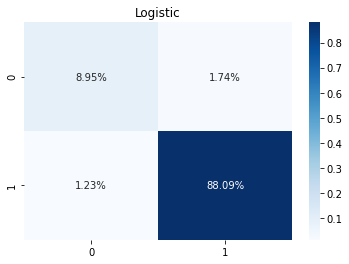

In [117]:
plt.title('Logistic')
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [70]:
print(classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       357
           1       0.98      0.99      0.98      2985

    accuracy                           0.97      3342
   macro avg       0.93      0.91      0.92      3342
weighted avg       0.97      0.97      0.97      3342



In [71]:
log_reg_auc = roc_auc_score(y_test, log_y_pred)
log_reg_auc=np.round(log_reg_auc,2)

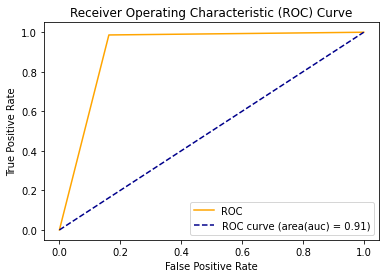

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, log_y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area(auc) = %0.2f)' % log_reg_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# LinearDiscriminantAnalysis

In [73]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [74]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [75]:
lda.score(x_train,y_train)

0.9229289561426006

In [76]:
lda.score(x_test,y_test)

0.9228007181328546

In [77]:
lda_y_pred = lda.predict(x_test)
accuracy = accuracy_score(y_test,lda_y_pred)
accuracy

0.9228007181328546

In [106]:
cm_lda = confusion_matrix(y_test, lda_y_pred)
cm_lda

array([[ 202,  155],
       [ 103, 2882]], dtype=int64)

<AxesSubplot:title={'center':'LinearDiscriminantAnalysis'}>

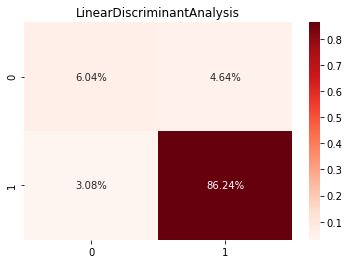

In [116]:
plt.title('LinearDiscriminantAnalysis')
sns.heatmap(cm_lda/np.sum(cm_lda), annot=True, 
            fmt='.2%', cmap='Reds')

In [79]:
print(classification_report(y_test, lda_y_pred))

              precision    recall  f1-score   support

           0       0.66      0.57      0.61       357
           1       0.95      0.97      0.96      2985

    accuracy                           0.92      3342
   macro avg       0.81      0.77      0.78      3342
weighted avg       0.92      0.92      0.92      3342



In [80]:
lda_auc = roc_auc_score(y_test, lda_y_pred)
lda_auc =np.round(lda_auc,2)
lda_auc

0.77

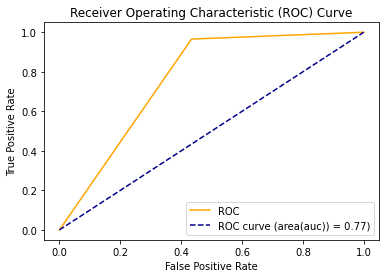

In [81]:
fpr, tpr, thresholds = roc_curve(y_test, lda_y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area(auc)) = %0.2f)' % lda_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()